In [1]:
import tensorflow as tf

url       = 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg'
file_name = 'YellowLabradorLooking_new.jpg'
path = tf.keras.utils.get_file(file_name, url)

In [2]:
print(path)

C:\Users\Dinh Vinh\.keras\datasets\YellowLabradorLooking_new.jpg


In [3]:
img = tf.io.read_file(path)
img = tf.image.decode_image(img, channels=3)

print(img.shape)
print(type(img))

(577, 700, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [4]:
print(tf.math.reduce_min(img))
print(tf.math.reduce_max(img))

tf.Tensor(0, shape=(), dtype=uint8)
tf.Tensor(255, shape=(), dtype=uint8)


In [5]:
# return normalized floating point values in the range [0, 1)

img = tf.image.convert_image_dtype(img, tf.float32)
print(tf.math.reduce_min(img))
print(tf.math.reduce_max(img))

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


In [ ]:
# clip_by_value

In [6]:
data = tf.random.normal((100, 100, 3))
print(tf.math.reduce_min(data))
print(tf.math.reduce_max(data))

tf.Tensor(-3.9192731, shape=(), dtype=float32)
tf.Tensor(4.196903, shape=(), dtype=float32)


In [7]:
data = tf.clip_by_value(data, clip_value_min=0.0, clip_value_max=1.0)
print(tf.math.reduce_min(data))
print(tf.math.reduce_max(data))

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


In [ ]:
# cudnn

In [8]:
# ~tf.reduce_sum(inputs, axis=0)
result = tf.add_n([1, 2, 3])
print(result)

tf.Tensor(6, shape=(), dtype=int32)


In [ ]:
# load image

In [9]:
import PIL.Image
import tensorflow as tf
import matplotlib.pyplot as plt
import IPython.display as display
import numpy as np

In [10]:
def load_img(path_to_img):
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    
    img = tf.image.convert_image_dtype(img, tf.float32)  
    
    img = tf.image.resize(img, (422, 512))
    img = img[tf.newaxis, :]

    return img

In [11]:
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

    plt.imshow(image)
    if title:
        plt.title(title)

(1, 422, 512, 3)


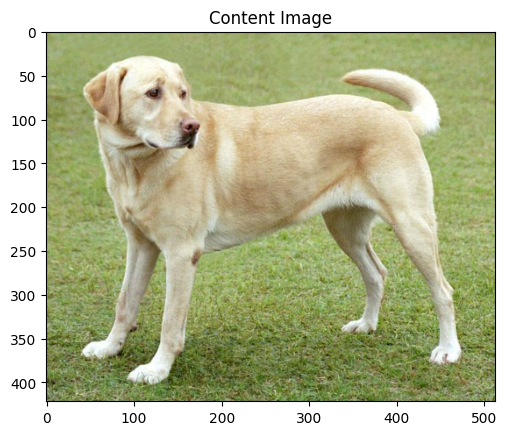

In [12]:
url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg'
file_name = 'YellowLabradorLooking_new.jpg'
path = tf.keras.utils.get_file(file_name, url)

image = load_img(path)
print(image.shape)
imshow(image, 'Content Image')

In [14]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

In [ ]:
image = tf.random.uniform( (400, 400, 3), minval=0.0, maxval=1.5)
print(image.shape)
print(tf.math.reduce_min(image))
print(tf.math.reduce_max(image))

In [13]:
def clip_0_1(image):
    return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

image = clip_0_1(image)
print(tf.math.reduce_min(image))
print(tf.math.reduce_max(image))

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


In [ ]:
display.display(tensor_to_image(image))

# (1, 400, 400, 3)

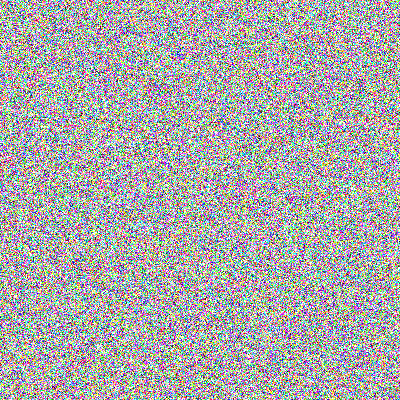

In [15]:
for _ in range(30):
    image = tf.random.uniform( (400,400,3), minval=0.0, maxval=1.5)
    image = clip_0_1(image)    
    
    display.clear_output(wait=True)
    display.display(tensor_to_image(image))

# Einsum

In [ ]:
# vector
import tensorflow as tf

u = tf.convert_to_tensor([3, 2, 4, 1], dtype=tf.int64)
v = tf.convert_to_tensor([2, 1, 0, 3], dtype=tf.int64)

print(u)
print(v)

In [ ]:
# matrix
A = tf.convert_to_tensor([[0, 2, 1],
                          [3, 1, 4]], dtype=tf.int64)
B = tf.convert_to_tensor([[2, 5],
                          [0, 1],
                          [3, 4]], dtype=tf.int64)

print(A)
print(B)

In [ ]:
# Matrix multiplication
C = tf.einsum('ij,jk->ik', A, B)
print(C)

In [ ]:
import tensorflow as tf

u = tf.convert_to_tensor([3, 2, 4, 1])
v = tf.convert_to_tensor([2, 1, 0, 3])

# dot product
r = tf.einsum('i,i->', u, v)
print(r)

In [ ]:
import tensorflow as tf

u = tf.convert_to_tensor([3, 2, 4, 1])
v = tf.convert_to_tensor([2, 1, 0, 3])

# outer product
r = tf.einsum('i,j->ij', u, v)
print(r)

In [ ]:
import tensorflow as tf

# matrix
A = tf.convert_to_tensor([[0, 2, 1],
                          [3, 1, 4]]))

# transpose
r = tf.einsum('ij->ji', A)
print(r)

In [ ]:
import tensorflow as tf

# matrix
A = tf.convert_to_tensor([[5, 2, 1],
                          [3, 1, 6],
                          [2, 4, 3]])

# diagonal
r = tf.einsum('ii->i', A)
print(r)

In [ ]:
import tensorflow as tf

# matrix
A = tf.convert_to_tensor([[5, 2, 1],
                          [3, 1, 6],
                          [2, 4, 3]])

# trace
r = tf.einsum('ii->', A)
print(r)

In [ ]:
import tensorflow as tf

# matrices
A = tf.convert_to_tensor([[[3, 0, 1],
                           [4, 2, 3]],
                          [[1, 0, 2],
                           [3, 2, 1]]], dtype=tf.int64)
B = tf.convert_to_tensor([[[1, 0],
                           [2, 2],
                           [1, 3]],
                          [[3, 1],
                           [0, 2],
                           [1, 3]]], dtype=tf.int64)

print(A[0])
print(A[1])
print()
print(B[0])
print(B[1])

In [ ]:
C = tf.einsum('bij,bjk->bik', A, B)
print(C[0])
print(C[1])

In [ ]:
import tensorflow as tf

# matrices
A = tf.convert_to_tensor([[3, 0, 1],
                          [4, 2, 3]])
B = tf.convert_to_tensor([[1, 0, 2],
                           [3, 2, 1]])

# element-wise multiplication
C = tf.einsum('ij,ij->ij', A, B)
print(C)

In [ ]:
import tensorflow as tf

# matrices
A = tf.convert_to_tensor([[3, 0, 1],
                          [4, 2, 3]])

# element-wise multiplication
C = tf.einsum('ij,kj->ik', A, A)
print(C)

In [ ]:
# vector

import tensorflow as tf

u = tf.convert_to_tensor([3, 2, 4, 1], dtype=tf.int64)
v = tf.convert_to_tensor([2, 1, 0, 3], dtype=tf.int64)

print(u)
print(v)

In [ ]:
e = tf.einsum('i,i->i', u, v)
print(e)

In [ ]:
e = tf.einsum('i,j->i', u, v)
print(e)

In [ ]:
e = tf.einsum('i,j->j', u, v)
print(e)

In [ ]:
e = tf.einsum('i,i->', u, v)
print(e)

In [ ]:
# matrix

A = tf.random.uniform(shape=[2, 3], minval=0, maxval=8, dtype=tf.int64)
B = tf.random.uniform(shape=[3, 2], minval=0, maxval=8, dtype=tf.int64)
print(A)
print(B)

In [ ]:
A = tf.convert_to_tensor([[0, 2, 1],
                          [3, 1, 4]], dtype=tf.int64)
B = tf.convert_to_tensor([[3, 1],
                          [0, 2],
                          [1, 4]], dtype=tf.int64)

print(A)
print(B)

In [ ]:
r = tf.linalg.matmul(A, B)
print(r)

In [ ]:
e = tf.einsum('ij,ji->i', A, B)
print(e)

In [ ]:
e = tf.einsum('ij,ji->j', A, B)
print(e)

In [ ]:
e = tf.einsum('ij,ji->ij', A, B)
print(e)

In [ ]:
e = tf.einsum('ik,kj->ij', A, B)
print(e)

In [ ]:
m0 = tf.random.uniform(shape=[2, 3], minval=0, maxval=5, dtype=tf.int64)
m1 = tf.random.uniform(shape=[3, 1], minval=0, maxval=5, dtype=tf.int64)
#e = tf.einsum('ij,jk->ik', m0, m1)

# output[i,k] = sum_j m0[i,j] * m1[j, k]
print(m0)
print(m1)
#print(e)

In [ ]:
e = tf.einsum('ij,jk->ik', m0, m1)
print(e)

In [ ]:
data = tf.random.uniform(shape=[1, 26, 32, 512], minval=0, maxval=5, dtype=tf.int64)
print(data.shape)

In [ ]:
data = tf.random.uniform(shape=[1, 1, 2, 3], minval=0, maxval=5, dtype=tf.int64)
e = tf.einsum('bijc,bijd->bcd', data, data)

print(data[:,:,:,0])
print(data[:,:,:,1])
print(data[:,:,:,2])
print(e)

## gram matrix

In [ ]:
import numpy as np

data = np.array([[4, 0, 3, 1],
                 [3, 0, 1, 2],
                 [4, 5, 0, 3]])
print(data)

In [ ]:
gram = data @ data.T
print(gram)

In [ ]:
data.T